# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [18]:
import importlib

import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import dynamics
importlib.reload(dynamics)
import ddpg_agent
importlib.reload(ddpg_agent)


from dynamics import Dynamics
from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [19]:
env = Dynamics(dataset = 'mnist', vae = 'VAE_mnist', cls = 'CLS_mnist', target = None)
env.reset()
state_size = env.state_size()
action_size = env.action_size()
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

### 3. Train the Agent with DDPG

Episode 100	Average Score: -4389.98
Episode 200	Average Score: -4305.49
Episode 300	Average Score: -4305.49
Episode 400	Average Score: -4305.49
Episode 500	Average Score: -4305.49
Episode 600	Average Score: -4305.49
Episode 700	Average Score: -4305.49
Episode 800	Average Score: -4305.49
Episode 900	Average Score: -4305.49
Episode 1000	Average Score: -4305.49
Episode 1100	Average Score: -4305.49
Episode 1200	Average Score: -4305.49
Episode 1300	Average Score: -4305.49
Episode 1400	Average Score: -4305.49
Episode 1500	Average Score: -4305.49
Episode 1600	Average Score: -4305.49
Episode 1700	Average Score: -4305.49
Episode 1800	Average Score: -4305.49
Episode 1900	Average Score: -4305.49
Episode 2000	Average Score: -4305.49
Episode 2100	Average Score: -4305.49
Episode 2200	Average Score: -4305.49
Episode 2300	Average Score: -4305.49
Episode 2400	Average Score: -4305.49
Episode 2500	Average Score: -4305.49
Episode 2600	Average Score: -4305.49
Episode 2700	Average Score: -4305.49
Episode 28

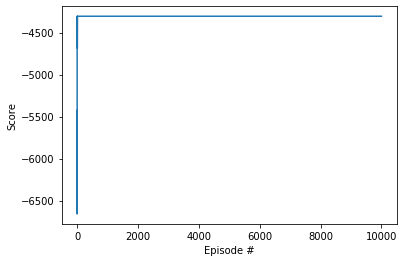

In [20]:
def ddpg(n_episodes=10000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
scores = ddpg()

### 4. Watch a Smart Agent!

In [20]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    env.render()
    state, reward, done, _ = env.step(action)
    print(reward, done)
    if done:
        break 
img = env.render()
img.show()
#env.close()

0.2396273311609138 False
0.23962733117704452 False
0.23962733119123836 False
0.2396273517189647 False
0.2396273517393759 False
0.23962735173856986 False
0.2396273517538285 False
0.2396273722640375 False
0.2396273722864819 False
0.23962737228470699 False
0.23962737229924103 False
0.23962739281639162 False
0.23962739282470796 False
0.23962739283108714 False
0.23962739286818868 False
0.23962739285763127 False
0.23962741338487334 False
0.23962741340003377 False
0.23962741341272648 False
0.23962741342007352 False
0.23962743394736166 False
0.23962743395383673 False
0.2396274339761825 False
0.23962743398256045 False
0.23962743398806652 False
0.2396274545168075 False
0.23962745454512535 False
0.23962745456256349 False
0.23962745455103585 False
0.2396274750957445 False
0.23962747510318724 False
0.23962747512553187 False
0.23962747513094002 False
0.23962747515435007 False
0.23962749566615474 False
0.23962749568849884 False
0.2396274956940034 False
0.2396274957173161 False
0.23962751622897793 Fal

### 6. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  